In [0]:
# 파일 업로드 방법
# chrome://settings/content/cookies?
# 로 가서 타사 쿠키 차단 풀어야한다. 
# from google.colab import files
# uploaded = files.upload()

In [2]:
!pip install graphviz

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [0]:
import pydot

In [0]:
d = load_breast_cancer()

In [0]:
X = d.data

In [0]:
y = d.target

In [9]:
X.shape

(569, 30)

In [10]:
y.shape

(569,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=2000)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rf.score(X_test, y_test)

0.972027972027972

In [17]:
## 딥러닝 간단 실습! 

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


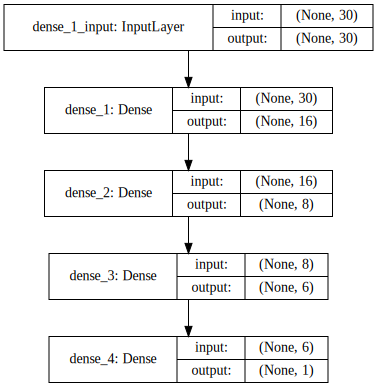

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(classifier, show_shapes=True).create(prog='dot', format='svg'))

In [34]:
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100,verbose=0)

![](https://image.slidesharecdn.com/random-171120113837/95/-43-638.jpg?cb=1511177981)

In [0]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [36]:
float(len((y_test == y_pred).nonzero()[0]))/len(y_test)

0.9090909090909091

In [0]:
# 딥러닝이 만능은 아니다. 데이터가 거대할때 비로소 위력을 보임. 데이터나 특성이 천개 미만이라면 전통 기계학습을 사용하자. 